# To Predict The mobile Price Using Regression Algoritam With Python

In [1]:
import numpy as np
import pandas as ps
import seaborn as sns
import matplotlib.pyplot as plt  # for plot the graph

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import r2_score, mean_squared_error,mean_squared_error,mean_absolute_error


In [6]:
data =ps.read_csv('C:/Users/Dinesh Kumar/Downloads/mobile_price_test.csv')

In [7]:
data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,227,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [8]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [9]:
data.describe()


,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.122000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.928773,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [10]:
#check the null value occure 
data.isnull().any()

id               False
battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
dtype: bool

C:\Users\Dinesh Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fc', ylabel='Density'>

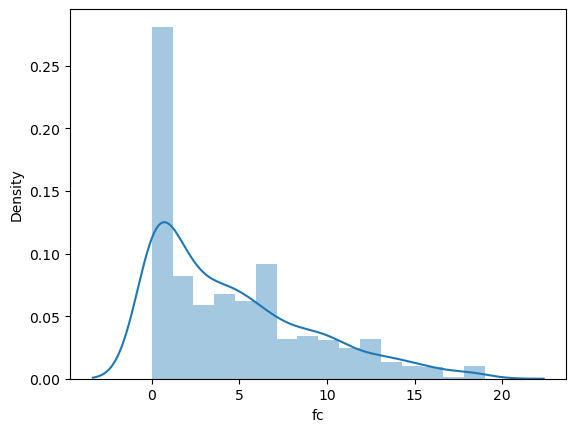

In [12]:
sns.distplot(data['fc'])

<AxesSubplot:>

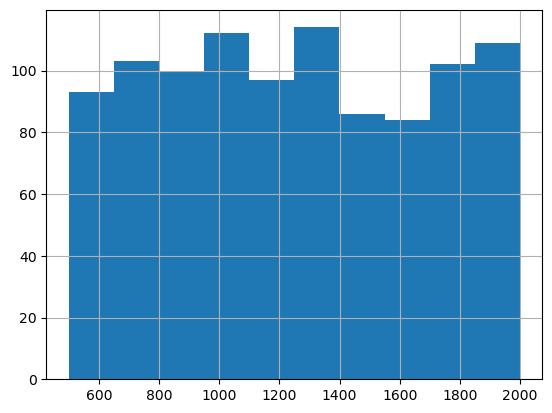

In [13]:
#Battery_power
data['battery_power'].hist()

In [14]:
#blue
data['blue'].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='blue', ylabel='count'>

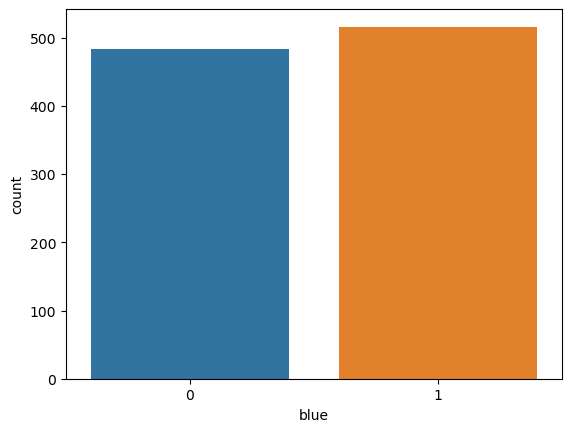

In [15]:
sns.countplot(x='blue', data=data)

In [16]:
#clock_speed
data['clock_speed'].unique()

array([1.8, 0.5, 2.8, 1.4, 2.9, 2.4, 2.2, 1. , 1.7, 2.6, 0.6, 0.7, 1.6,
       3. , 1.2, 2.1, 0.9, 2.3, 2. , 0.8, 1.9, 2.5, 1.1, 2.7, 1.3, 1.5])

<AxesSubplot:xlabel='blue', ylabel='count'>

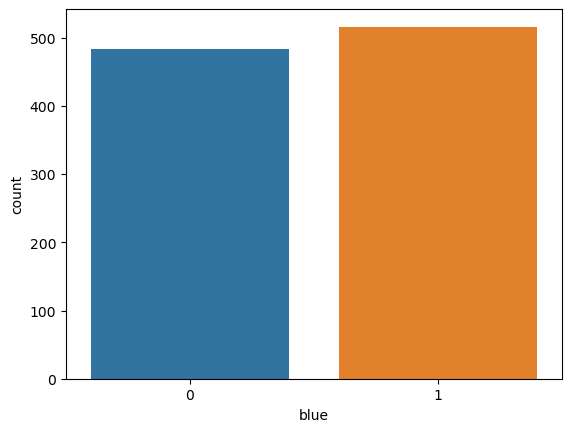

In [17]:
sns.countplot(x='blue',data=data)

In [18]:
#Split the column using iloc
x=data.iloc[:,data.columns=='blue']
y=data.iloc[:,data.columns=='fc']

In [19]:
x.head()

,blue
0,1
1,1
2,1
3,0
4,0


In [20]:
y.head()

,fc
0,14
1,4
2,1
3,18
4,11


In [21]:
type(x)

pandas.core.frame.DataFrame

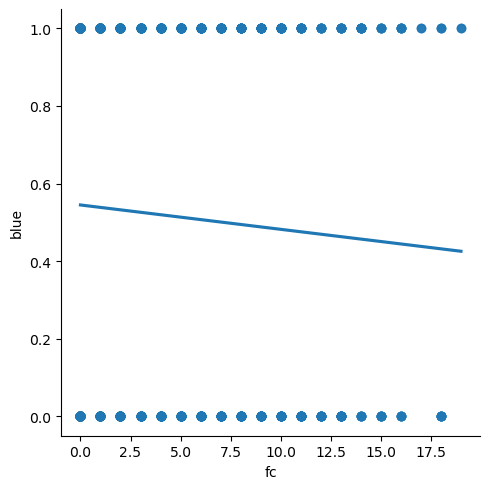

In [23]:
#Compare the Price with indual data
#rating,price

sns.lmplot(x='fc', y='blue', data=data, ci=None)
plt.show()

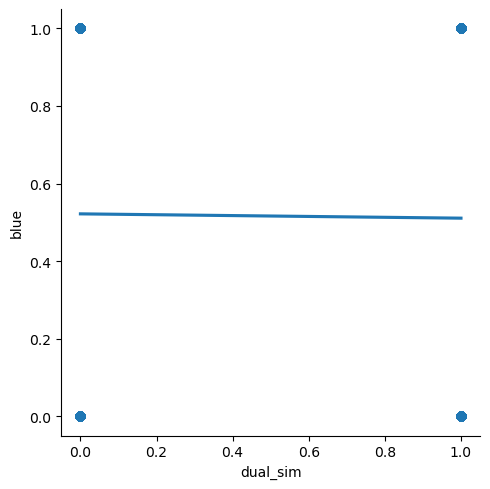

In [24]:
sns.lmplot(x='dual_sim', y='blue', data=data, ci=None)
plt.show()

# Test and Train the dataset

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [27]:
regressor = LinearRegression()

In [28]:
regressor.fit(X_train, y_train)

LinearRegression()

In [29]:
X_train

,blue
105,1
68,1
479,1
399,0
434,0
...,...
835,0
192,0
629,0
559,0


In [30]:
y_train

,fc
105,5
68,3
479,1
399,0
434,3
...,...
835,5
192,16
629,1
559,7


In [31]:
#Testing variable are get randomelly

In [32]:
X_test

,blue
993,1
859,1
298,1
553,0
672,1
...,...
167,0
998,1
984,1
491,0


In [33]:
y_test

,fc
993,14
859,6
298,0
553,3
672,3
...,...
167,6
998,0
984,1
491,2


# Making Predictions

In [35]:
y_pred = regressor.predict(X_test)

y_pred

# Calculation

In [38]:
#Liner Regression 
lr = regressor.score(X_test, y_test)

# Calculate Absolute, Squared errors

In [39]:
mean_squared_error(y_test,y_pred)

21.466575562826158

In [40]:
mean_absolute_error(y_test,y_pred)

3.7336554522373064